In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the parameters/arguments for ImageDataGenerator class

In [33]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Applying ImageDataGenerator functionality to trainset and testset

In [34]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/train', target_size = (64,64),
                                            batch_size = 5, class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/test', target_size = (64,64),
                                          batch_size = 8, class_mode = 'categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


# Importing the Libraries

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initializing the Model

In [36]:
model = Sequential()

# Adding CNN Layers

In [37]:
#First Convolution Layer and Pooling
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#Second Convolution Layer and Pooling
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#Flattening the Layers
model.add(Flatten())

# Adding Dense Layers

In [38]:
#Adding a fully connected layer
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 6, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# Configuring the Learning Process

In [39]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [40]:
model.fit_generator(x_train, steps_per_epoch = len(x_train), epochs = 5,
    validation_data = x_test, validation_steps = len(x_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


119/119 [==============================] - 7s 55ms/step - loss: 1.4076 - accuracy: 0.4478 - val_loss: 0.8831 - val_accuracy: 0.7000
Epoch 2/5
119/119 [==============================] - 6s 52ms/step - loss: 0.6701 - accuracy: 0.7475 - val_loss: 0.7406 - val_accuracy: 0.8000
Epoch 3/5
119/119 [==============================] - 6s 53ms/step - loss: 0.5073 - accuracy: 0.7946 - val_loss: 0.4611 - val_accuracy: 0.8667
Epoch 4/5
119/119 [==============================] - 7s 58ms/step - loss: 0.3044 - accuracy: 0.8889 - val_loss: 0.4815 - val_accuracy: 0.8667
Epoch 5/5
119/119 [==============================] - 7s 59ms/step - loss: 0.2493 - accuracy: 0.9074 - val_loss: 0.4033 - val_accuracy: 0.9333


# Save the Model

In [41]:
model.save('gesture.h5')
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
  json_file.write(model_json)

# Test the Model

**Prediction**

In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5")
path = "/content/drive/MyDrive/Dataset/test/0/1.jpg"


**Plotting Images**

Populating the interactive namespace from numpy and matplotlib


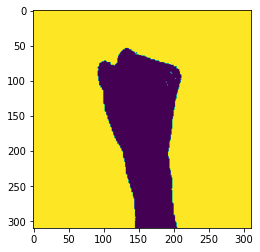

In [43]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(path)
imgplot = plt.imshow(imgs)
plt.show()